# Classification

## 1. Machine Learning with Scikit Learn

Machine Learning atau yang dikenal sebagai pembelajaran mesin, dimana mesin(komputer) belajar untuk membuat keputusan dari data tanpa diprogram secara eksplisit (traditional programming). Contohnya adalah memprediksi apakah suatu email dikatakan spam atau tidak spam. secara garis besar machine learning terdiri dari dua jenis yaitu 

1. **unsupervised learning**, proses belajar yang dilakukan adalah mencari pola tersembunyi darir data yang tidak memiliki label. contohnya misalkan sebuah bisnis yang ingin mengelompokan pelanggannya ke dalam kategori yang berbeda. 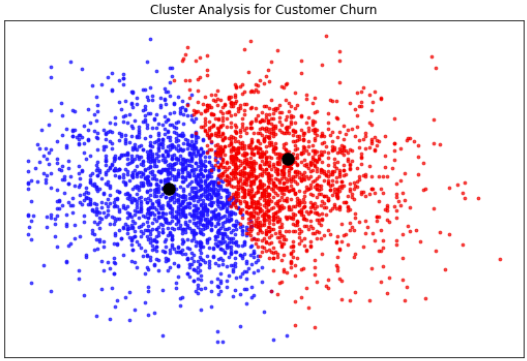

<br>
<br>
    
2. **supervised learning**, proses belajarnya yang dilakukan memprediksi nilai-nilai yang sudah diketahui variable nya. contohnya, memprediksi posisi pemain basket berdasarkan poin pertandingan 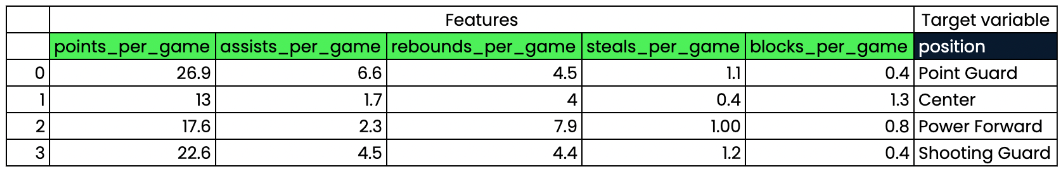
    

### 1.1 Supervised Learning 

Pada jenis machine learning bertipe supervised learning terbagi menjadi dua jenis yaitu,
    
- **klasifikasi**, digunakan untuk memprediksi label atau **kategori** dari suatu pengamatan. contoh ingin memprediksi suatu transaksi bank dikatakan curang atau tidak atau dikenal juga dengan klasifikasi biner. 
- **regresi**, digunakan untuk memprediksi nilai kontinu (dapat diukur).contohnya adalah menentukan harga rumah

> #### Terminologi dalam Machine Learning

> - feature = predictor = independent  = explanatory variable 
> - target = label = dependent  = respond 

### 1.2 Syarat menggunakan Supervised Learning

1. **Syarat sebelum**

- tidak boleh ada missing values
- data harus dalam bentuk numerik
- data disimpan di dalam library Pandas dataframe atau Numpy


2. **Hal penting selanjutnya**

- melakukan EDA untuk pertama kali : statistika deskriptif, visualisasi data dll

### 1.3 Scikit Learn syntax

1. import model supervised learning  `from sklearn.module import Model`
2. membuat variable bernama model  ` model = Model()`
3. fitting model `model.fit(X, y)`
4. melakukan prediksi model `predictions = model.predict(X_new)`

### Exercise 

1. **Binary classification**

In the video, you saw that there are two types of supervised learning — classification and regression. Recall that binary classification is used to predict a target variable that has only two labels, typically represented numerically with a zero or a one.

A dataset, churn_df, has been preloaded for you in the console.

Your task is to examine the data and choose which column could be the target variable for binary classification.

answer : `churn`

> Correct! churn has values of 0 or 1, so it can be predicted using a binary classification model.

**The supervised learning workflow**

Recall that scikit-learn offers a repeatable workflow for using supervised learning models to predict the target variable values when presented with new data.

Reorder the pseudo-code provided so it accurately represents the workflow of building a supervised learning model and making predictions.

- Drag the code blocks into the correct order to represent how a supervised learning workflow would be executed.

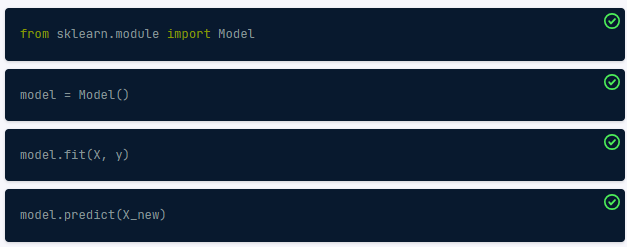

> Great work! You can see how scikit-learn enables predictions to be made in only a few lines of code!

## 2.The Clasification Challenge

Supervised learning menggunakan labeled. label adalah hasil yang diharapkan atau kategori yang diberikan kepada setiap contoh dalam dataset pelatihan. Dalam konteks klasifikasi, label mengidentifikasi kategori atau kelas ke mana setiap contoh data termasuk. Misalnya, dalam tugas klasifikasi gambar, label dapat berupa "kucing" atau "anjing" untuk setiap gambar. 

### 2.1 Tahapan Klasifikasi

Tahapan klasifikasi labels dari unseen data (data uji). data uji adalah dataset yang digunakan untuk menguji kinerja model setelah pelatihan selesai. Data ini tidak digunakan selama pelatihan, sehingga model belum pernah "melihat" data ini sebelumnya. Tujuan dari penggunaan data yang belum terlihat adalah untuk mengukur sejauh mana model mampu menggeneralisasi pengetahuannya ke data baru yang tidak ada dalam dataset pelatihan. Dengan kata lain, kita ingin tahu seberapa baik model berkinerja pada data baru yang belum pernah dilihat sebelumnya.

1. membuat model klasifikasi
2. model akan belajar dari data labeled (data train) 
3. kemudian pada data unlabeled (data uji) digunakan sebagai data input
4. selanjutnya dibua model prediksi dari data uji



### 2.2 Algoritma KNN 

KNN adalah salah satu metode klasifikasi. KNN melakukan prediksi data dengan melihat nilai K (koefisien) dan menggunakan voting mayoritas untuk menentukan hasilnya 
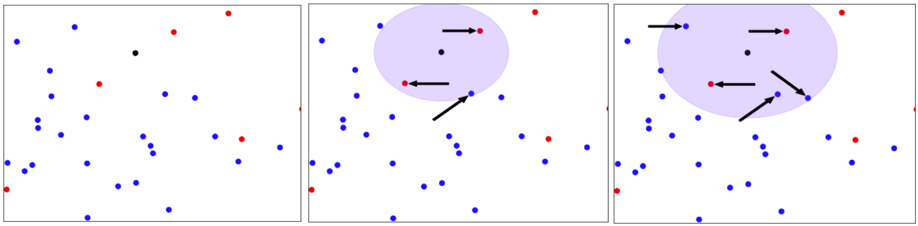
dari gambar diatas, bagaimana cara melakukan klasifikasi ? 
- jika k = 3 kita akan klasifikasikan sebagai merah, karena ada dua titik terdekatnya berwarna merah
- namun jika k = 5 akan kita klasifikasikan sebagai biru, karena mayoritas terdekatnya adalah biru 

### 2.3 KNN Intuition

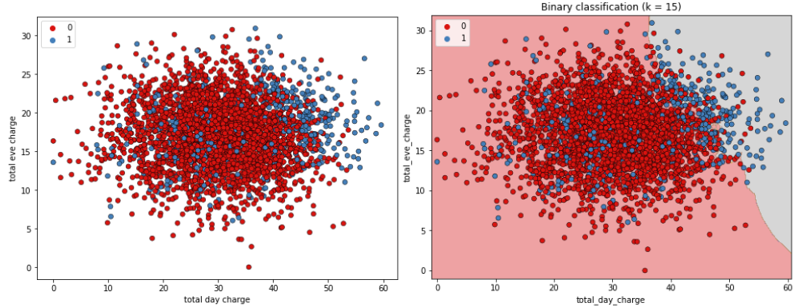

- pada scatter plot diatas, diketahui bahwa merah adalah transaksi tidak churn dan biru adalah transaksi churn. 
- kemudiandi divisualisasikan k = 15

### 2.4 KNN in Scikit Learn



In [36]:
import pandas as pd
churn_df = pd.read_csv('dataset/telecom_churn_clean.csv')
churn_df.head()

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [37]:
from sklearn.neighbors import KNeighborsClassifier # scikit learn mengharuskan feature dalam array, 
X = churn_df[['total_day_charge','total_eve_charge']].values # array 2D, method .values untuk konversi dari X dan y ke Array Numpy
y = churn_df['churn'].values # array 1D, target harus berupa kolom tunggal
print(X.shape, y.shape)

(3333, 2) (3333,)


**insight:**
- terdapat 3333 total pengataman pada dua kolom prediktor
- terdapat 3333 pengamatan dalam satu kolom target
- setelah berhasil membagi data prediktor dan target, selanjutnya membuat instance variable

>**instance variable** adalah elemen kunci dalam machine learning karena digunakan untuk meyimpan data yang akan digunakan untuk melatih atau menguji model machine learning

>**pelatihan model/fitting model** adalah tahap pelatihan model machine learning. melalui method .fit() maka model akan memahami dan mencari pola untuk membuat prediksi 

In [38]:
# membuat instance variable
knn = KNeighborsClassifier(n_neighbors= 15)

# melakukan fitting model
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

setelah pelatihan model berhasil dilakukan, kita ingin menguji dengan memasukan data yang belum pernah dilihat/ unseen data. Pada data ini akan dilalukan pengujian/ testing data, dimana hasilnya merupakan hasil prediksi dari data sebelumnya.

In [39]:
# memasukan unseen data/data uji
import numpy as np

X_new = np.array([[56.8,17.5],[24.4,24.1],[50.1,10.9]])

print(X_new.shape)

(3, 2)


In [40]:
# melakukan prediksi pada data uji

predictions = knn.predict(X_new)

print('Predictions: {}'.format(predictions))

# 1 = churn
# 0 = tidak ada churn

Predictions: [1 0 0]


**insight :**
- ada satu data diprediksi churn dari 3 data baru

 ### Exercise

**1. k-Nearest Neighbors: Fit**
    
In this exercise, you will build your first classification model using the churn_df dataset, which has been preloaded for the remainder of the chapter.

The features to use will be "account_length" and "customer_service_calls". The target, "churn", needs to be a single column with the same number of observations as the feature data.

You will convert the features and the target variable into NumPy arrays, create an instance of a KNN classifier, and then fit it to the data.

numpy has also been preloaded for you as np.

- Import KNeighborsClassifier from sklearn.neighbors.
- Create an array called X containing values from the "account_length" and "customer_service_calls" columns, and an array called y for the values of the "churn" column.
- Instantiate a KNeighborsClassifier called knn with 6 neighbors.
- Fit the classifier to the data using the .fit() method.


In [41]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

> Now that your KNN classifier has been fit to the data, it can be used to predict the labels of new data points.

**2. k-Nearest Neighbors: Predict**

Now you have fit a KNN classifier, you can use it to predict the label of new data points. All available data was used for training, however, fortunately, there are new observations available. These have been preloaded for you as X_new.

The model knn, which you created and fit the data in the last exercise, has been preloaded for you. You will use your classifier to predict the labels of a set of new data points:

*X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])*

- Create y_pred by predicting the target values of the unseen features X_new.
- Print the predicted labels for the set of predictions.

In [42]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new)

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


> The model has predicted the first and third customers will not churn in the new array. But how do we know how accurate these predictions are? Let's explore how to measure a model's performance in the next video.

### 3. Measuring Model Performance

#### 3.1 Split Data

Setelah berhasil membuat prediksi bagaimana kita tahu bahwa model yang kita prediksi itu benar ? untuk itu kita perlu melakukan evaluasi agar kita dapat mengetahui seberapa baik prediksi yang kita lakukan. Dalam klasifikasi, akurasi menjadi metriks yang umum digunakan. Bagaimana menghitung **Akurasi** ? yaitu dengan jumlah prediksi benar dibagi total prediksi. Akan tetapi untuk perhitungannya tidak boleh menggunakan data train / data hasil fitting model, karena apabila kita mengukur data dari data train maka performa model tidak aka terlihat dengan baik. Untuk mengatasi hal tersebut maka **split data** adalah solusinya,
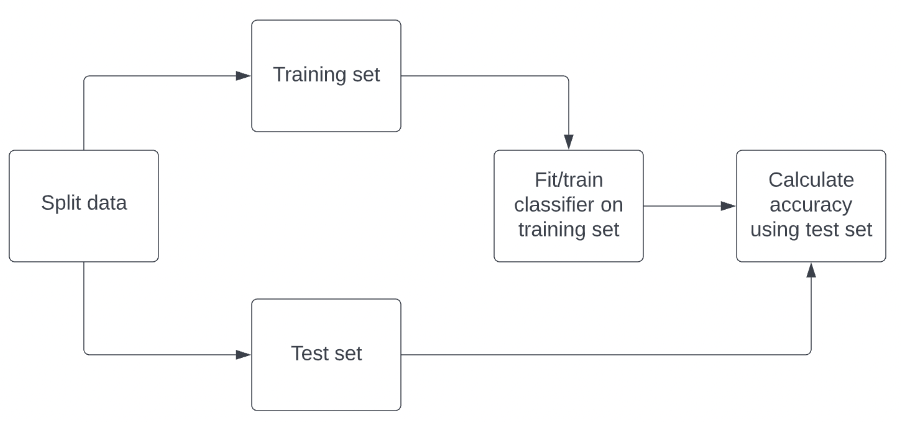

dari gambar diatas, split data adalah proses membagi dataset menjadi data train (data yang akan dilakukan fitting model) dan data test (unseen data) setelah data dipisah, kemudian akan dihitung nilai akurasinya.

#### 3.2 Split Data in Scikit Learn

In [43]:
 # import train_test_split
from sklearn.model_selection import train_test_split

# splitting data train dan data test
# train test split akan mengembalikan 4 variable : X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, # prediktor
                                                    y, # target
                                                    test_size= 0.3, # bobotnya 70:30 > 30%  
                                                    random_state= 21, # set seed
                                                    stratify= y) # memastikan pembagian data mengikuti proporsi kelas dalam y

In [44]:
# instance variable
knn = KNeighborsClassifier(n_neighbors= 6)

In [45]:
# fitting model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [46]:
# melakukan cek akurasi 
print(knn.score(X_test, y_test))

0.852


- hasil akurasi sebesar 85% tergolong rendah mengingat label kami memiliki rasio 9 : 1

#### 3.3 Kompleksitas Model

Bagaimana cara interpretasi nilai K ?

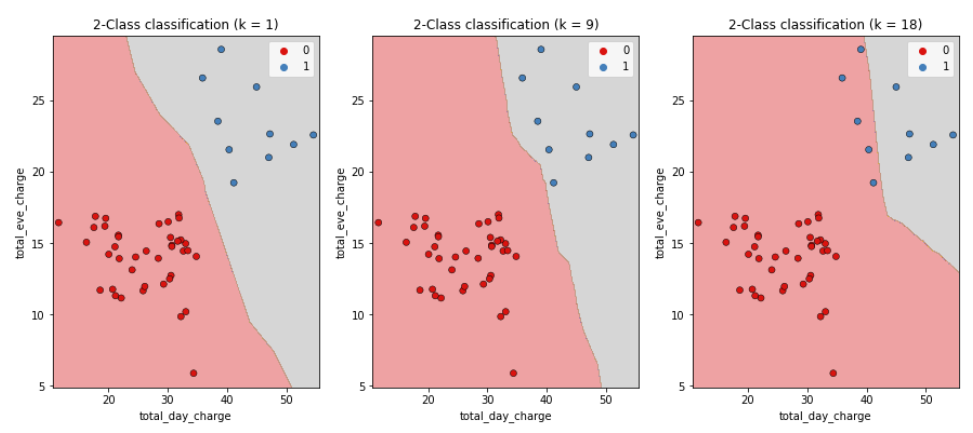

Dalam algoritma k-Nearest Neighbors (kNN), k adalah jumlah tetangga terdekat yang akan digunakan model untuk membuat prediksi. 

- makin besar nilai K, model akan semakin sederhana kurang mampu menangkap hubungan dalam kumpulan data = dapat menyebabkan underfitting
- semakin kecil nilai K, model akan semakin kompleks karena sensitif terhadap noise = dapat menyebabkan overfitting

Dengan Pemodelan KNN kita dapat menghitung akurasi data train dan data uji menggunakan nilai k melalui plotting

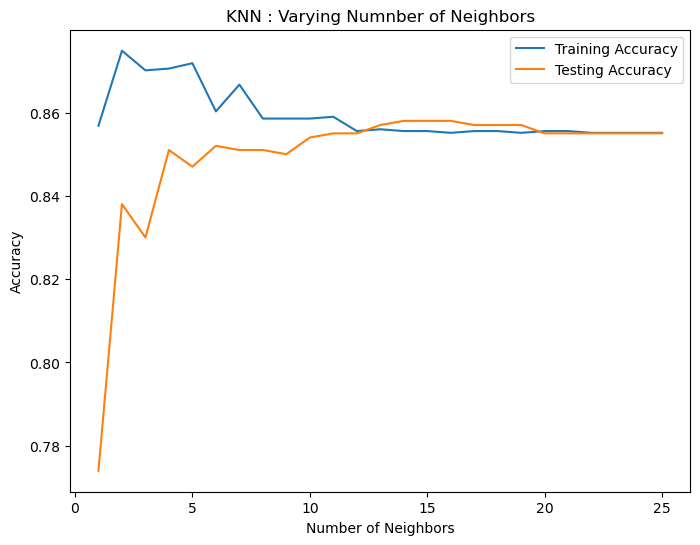

In [47]:
# membuat dictionary untuk menyimpan akurasi data train dan data uji
train_accuracies = {}
test_accuracies = {}

# nilai array yang berisi range nilai k
neighbors = np.arange(1,26)

# melakukan looping for untuk membangun beberrapa model menggunakan k yang berbeda
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)
    

# membuat plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title('KNN : Varying Numnber of Neighbors')
plt.plot(neighbors, train_accuracies.values(), label = 'Training Accuracy')
plt.plot(neighbors, test_accuracies.values(), label = 'Testing Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

**insight:**
- ketika nilai K melebihi 15 terjadi overfitting dimana pada data testing lebih tinggi dibandingkan data training 

### Exercise

**1. Train/test split + computing accuracy**

Now that you have learned about the importance of splitting your data into training and test sets, it's time to practice doing this on the churn_df dataset!

NumPy arrays have been created for you containing the features as X and the target variable as y. You will split them into training and test sets, fit a KNN classifier to the training data, and then compute its accuracy on the test data using the .score() method.

- Import train_test_split from sklearn.model_selection.
- Split X and y into training and test sets, setting test_size equal to 20%, random_state to 42, and ensuring the target label proportions reflect that of the original dataset.
- Fit the knn model to the training data.
- Compute and print the model's accuracy for the test data.

In [48]:
# Import the module
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.8545727136431784


>In a few lines of code you split a dataset, fit a KNN model, and found its accuracy to be 85%!

**2. Overfitting and underfitting**

Interpreting model complexity is a great way to evaluate performance when utilizing supervised learning. Your aim is to produce a model that can interpret the relationship between features and the target variable, as well as generalize well when exposed to new observations.

You will generate accuracy scores for the training and test sets using a KNN classifier with different n_neighbor values, which you will plot in the next exercise.

The training and test sets have been created from the churn_df dataset and preloaded as X_train, X_test, y_train, and y_test.

In addition, KNeighborsClassifier has been imported for you along with numpy as np.

- Create neighbors as a numpy array of values from 1 up to and including 12.
- Instantiate a KNN classifier, with the number of neighbors equal to the neighbor iterator.
- Fit the model to the training data.
- Calculate accuracy scores for the training set and test set separately using the .score() method, and assign the results to the index of the train_accuracies and test_accuracies dictionaries, respectively.

In [49]:
# Create neighbors
neighbors = np.arange(1, 13)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:  

    # Set up a KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=neighbor) 

    # Fit the model
    knn.fit(X_train, y_train)

    # Compute accuracy
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)

[ 1  2  3  4  5  6  7  8  9 10 11 12] 
 {1: 1.0, 2: 0.8885971492873218, 3: 0.8994748687171793, 4: 0.8750937734433608, 5: 0.878469617404351, 6: 0.8660915228807202, 7: 0.8705926481620405, 8: 0.8615903975993998, 9: 0.86384096024006, 10: 0.858589647411853, 11: 0.8604651162790697, 12: 0.8574643660915229} 
 {1: 0.7856071964017991, 2: 0.8470764617691154, 3: 0.8320839580209896, 4: 0.856071964017991, 5: 0.8545727136431784, 6: 0.8590704647676162, 7: 0.8605697151424287, 8: 0.8620689655172413, 9: 0.863568215892054, 10: 0.8605697151424287, 11: 0.8605697151424287, 12: 0.8605697151424287}


> Notice how training accuracy decreases as the number of neighbors initially gets larger, and vice versa for the testing accuracy? These scores would be much easier to interpret in a line plot, so let's produce a model complexity curve of these results.

**Visualizing model complexity**

Now you have calculated the accuracy of the KNN model on the training and test sets using various values of n_neighbors, you can create a model complexity curve to visualize how performance changes as the model becomes less complex!

The variables neighbors, train_accuracies, and test_accuracies, which you generated in the previous exercise, have all been preloaded for you. You will plot the results to aid in finding the optimal number of neighbors for your model.

- Add a title "KNN: Varying Number of Neighbors".
- Plot the .values() method of train_accuracies on the y-axis against neighbors on the x-axis, with a label of "Training Accuracy".
- Plot the .values() method of test_accuracies on the y-axis against neighbors on the x-axis, with a label of "Testing Accuracy".
- Display the plot.

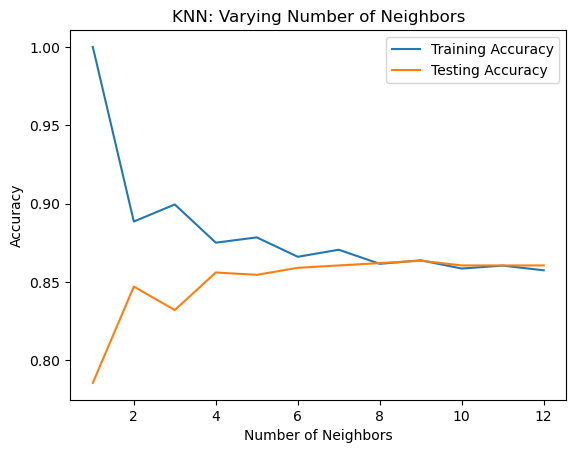

In [50]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

> See how training accuracy decreases and test accuracy increases as the number of neighbors gets larger. For the test set, accuracy peaks with 7 neighbors, suggesting it is the optimal value for our model. Now let's explore regression models!